### K-Nearest Neighbor Algorithmus:

#### Parameter:  

dataset = (X, Y)  
mit X := Features  
und Y := Classes  

K := Hyperparameter für die nächsten k Nachbarn  
sample := Neuer Datenpunkt zum Klassifizieren 

#### Pseudo-Code:

kNN (dataset, K, sample):  
  - Bestimme von jedem Punkt $p \in dataset$ die Distanz, mit der geg. Distanzfunktion.
  - Bestimme die $K$ nächst gelegenen Nachbarn und bestimme die zugehörige Klasse von $sample$.  

In [1]:
import numpy as np
np.random.seed(42)

def generate_dataset():
    cov = np.array([[1, 0], [0, 1]])
    data1 = np.random.multivariate_normal(np.array([0, 0]), cov, 10)
    data2 = np.random.multivariate_normal(np.array([-10, 4]), cov, 6)
    data3 = np.random.multivariate_normal(np.array([10, 10]), cov, 13)
    data = np.concatenate((data1, data2, data3), axis=0)
    classes = np.array([0 for i in range(10)] + [1 for i in range(6)] + [2 for i in range(13)])
    return data, classes

In [2]:
dataset, classes = generate_dataset()

In [3]:
print(dataset.shape)
print(classes.shape)

print("Datase, Classes")
print(dataset)
print(classes)

(29, 2)
(29,)
Datase, Classes
[[-5.97940599e-01 -5.65635345e-01]
 [-1.84560763e+00 -1.61251181e-01]
 [ 1.27156807e+00  1.33393161e+00]
 [-1.39364379e+00 -2.69022517e-01]
 [ 8.22161669e-01  1.23213164e-01]
 [ 1.00964674e+00  2.04369746e+00]
 [-8.60601926e-01  1.68319916e+00]
 [ 4.05862436e-01 -2.72789780e-01]
 [ 5.73988795e-01 -1.17725768e+00]
 [-2.07342105e-03 -3.40792950e-01]
 [-9.30217787e+00  4.96758114e+00]
 [-9.29076836e+00  6.33688208e+00]
 [-9.31327515e+00  4.73511349e+00]
 [-9.04039236e+00  3.47530057e+00]
 [-9.97886020e+00  3.98012492e+00]
 [-9.81203439e+00  3.58324700e+00]
 [ 9.74301398e+00  1.11187343e+01]
 [ 8.64184602e+00  9.06621509e+00]
 [ 9.34611485e+00  9.11014001e+00]
 [ 9.26040392e+00  1.03978648e+01]
 [ 8.11524922e+00  9.56321379e+00]
 [ 9.53739812e+00  1.06017474e+01]
 [ 9.98080677e+00  9.92971630e+00]
 [ 8.27361843e+00  1.03939289e+01]
 [ 9.96337489e+00  9.55132834e+00]
 [ 9.30515189e+00  9.04782368e+00]
 [ 1.12031040e+01  9.59910605e+00]
 [ 9.96132563e+00  1.0974

In [4]:
import matplotlib.pyplot as plt

def plot_dataset(dataset, classes):
    colors = ["red", "blue", "green"]
    for index, point in enumerate(dataset):
        plt.scatter(point[0], point[1], color=colors[classes[index]])
    plt.show()

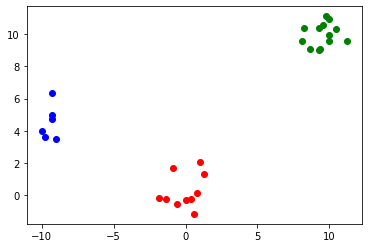

In [5]:
plot_dataset(dataset, classes)

### KNN Implementation

In [23]:
np.random.seed(42)

X = dataset
y = classes

In [32]:
class KNeighborsClassifier:
    def __init__(self, n_neighbors: int = 5):
        self.n_neighbors = n_neighbors
        self.X = None
        self.y = None
        self.num_classes = None
    
    def _distance(self, p1: np.ndarray, p2: np.ndarray):
        return np.linalg.norm(p1 - p2)
    
    def kneighbors(self, X_samples: np.ndarray):
        neighbors_idxs = np.array([
            np.argsort(
                np.array(
                    [self._distance(sample, x_i) for x_i in self.X]
                )
            )[:self.n_neighbors] for sample in X_samples
        ])
        return neighbors_idxs
    
    def fit(self, X: np.ndarray, y: np.ndarray):
        self.X = X
        self.y = y
        self.num_classes = len(np.unique(self.y))
    
    def _vote_class(self, neighbor_idxs: np.ndarray):
        votes = np.array([0 for class_idx in range(self.num_classes)])
        for neighbor_idx in neighbor_idxs:
            neighbor_class = self.y[neighbor_idx]
            votes[neighbor_class] += 1
        voted_class = np.argmax(votes)
        return voted_class
    
    def predict(self, X_samples: np.ndarray):
        neighbor_idxs = self.kneighbors(X_samples)
        y_pred = np.array([self._vote_class(neighbor_idx) for neighbor_idx in neighbor_idxs])
        return y_pred
    
    def score(self, X_samples: np.ndarray, y_classes: np.ndarray):
        y_pred = self.predict(X_samples)
        accuracy = np.sum([y_pred_i == y_i for y_pred_i, y_i in zip(y_pred, y_classes)]) / len(y_classes)
        return accuracy

In [33]:
x_test = np.array([[0, 4]])
y_test = np.array([0])

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X, y)

neighbors = clf.kneighbors(x_test)
print(f"NeighborIdxs:\n{neighbors}")
print(f"NeighborPoints:\n{X[neighbors]}")
print(f"NeighborClasses:\n{y[neighbors]}")

print(f"TestSamples:\n{x_test}")
print(f"Pred:\n{clf.predict(x_test)}")
print(f"Score:\n{clf.score(x_test, y_test)}")

NeighborIdxs:
[[5 6 2]]
NeighborPoints:
[[[ 1.00964674  2.04369746]
  [-0.86060193  1.68319916]
  [ 1.27156807  1.33393161]]]
NeighborClasses:
[[0 0 0]]
TestSamples:
[[0 4]]
Pred:
[0]
Score:
1.0


In [34]:
def plot_knn_prediction(clf, samples):
    colors = ["red", "blue", "green"]
    for index, point in enumerate(dataset):
        plt.scatter(point[0], point[1], color=colors[classes[index]])
    neighbor_idxs = clf.kneighbors(samples)
    neighbor_points = clf.X[neighbor_idxs]
    for idx, sample in enumerate(samples):
        plt.scatter(sample[0], sample[1], color="yellow")
        for neighbor_point in neighbor_points[idx]:
            plt.plot((neighbor_point[0], sample[0]), (neighbor_point[1], sample[1]), color="cyan")
    plt.show()

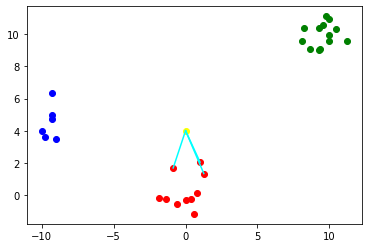

In [35]:
plot_knn_prediction(clf, x_test)